In [1]:
import os
import glob
import tempfile
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part3_GroundTruth.csv

!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part3_GroundTruth.csv

!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part3_GroundTruth.csv

--2024-05-04 15:47:54--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.29.252, 54.231.199.17, 54.231.170.241, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.29.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6229496702 (5.8G) [application/zip]
Saving to: ‘ISIC-2017_Training_Data.zip’

ISIC-2017_Training_ 100%[===================>]   5.80G  12.6MB/s    in 8m 2s   

2024-05-04 15:55:57 (12.3 MB/s) - ‘ISIC-2017_Training_Data.zip’ saved [6229496702/6229496702]

--2024-05-04 15:55:57--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part3_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.166.129, 52.217.203.145, 52.216.219.193, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.

In [ ]:
!unzip "./ISIC-2017_Training_Data.zip"
!unzip ".ISIC-2017_Validation_Data.zip"
!unzip "./ISIC-2017_Test_v2_Data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ISIC-2017_Training_Data/ISIC_0000112.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000112_superpixels.png  
 extracting: ISIC-2017_Training_Data/ISIC_0000113.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000113_superpixels.png  
 extracting: ISIC-2017_Training_Data/ISIC_0000116.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000116_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0000118.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000118_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0000119.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000119_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0000120.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000120_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0000121.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0000121_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0000122.jpg  
  inflating: ISIC-2017_Tr

In [2]:
directory = "/content/drive/MyDrive/Colab Notebooks/ELEC4840/Project/2017/"

root_dir = tempfile.mkdtemp() if directory is None else directory
os.chdir(root_dir)
os.listdir('.')

['ISIC-2017_Validation_Data',
 'ISIC-2017_Test_v2_Data',
 'ISIC-2017_Training_Data.zip',
 'ISIC-2017_Test_v2_Data.zip',
 'ISIC-2017_Test_v2_Part3_GroundTruth.csv',
 'ISIC-2017_Training_Part3_GroundTruth.csv',
 'ISIC-2017_Validation_Data.zip',
 'ISIC-2017_Validation_Part3_GroundTruth.csv',
 'ISIC-2017_Training_Data',
 'train',
 'val',
 'test',
 '2017_AlexNet.ipynb']

In [3]:
if not os.path.exists("./train"):
    os.makedirs("./train")
    os.makedirs("./train/benign")
    os.makedirs("./train/malignant")

if not os.path.exists("./val"):
    os.makedirs("./val")
    os.makedirs("./val/benign")
    os.makedirs("./val/malignant")

if not os.path.exists("./test"):
    os.makedirs("./test")
    os.makedirs("./test/benign")
    os.makedirs("./test/malignant")

In [3]:
print(os.path.exists('./train'))
print(os.path.exists('./val'))
print(os.path.exists('./test'))

True
True
True


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np

df = pd.read_csv("./ISIC-2017_Training_Part3_GroundTruth.csv")

for i in range(len(df)):
    name, label_m, label_sk = df["image_id"][i], df["melanoma"][i], df["seborrheic_keratosis"][i]
    label = "benign" if label_m == 0 else "malignant"
    shutil.copy("./ISIC-2017_Training_Data/"+name+".jpg", "./train/"+label+"/"+name+".jpg")

df = pd.read_csv("./ISIC-2017_Validation_Part3_GroundTruth.csv")

for i in range(len(df)):
    name, label_m, label_sk = df["image_id"][i], df["melanoma"][i], df["seborrheic_keratosis"][i]
    label = "benign" if label_m == 0 else "malignant"
    shutil.copy("./ISIC-2017_Validation_Data/"+name+".jpg", "./val/"+label+"/"+name+".jpg")

df = pd.read_csv("./ISIC-2017_Test_v2_Part3_GroundTruth.csv")

for i in range(len(df)):
    name, label_m, label_sk = df["image_id"][i], df["melanoma"][i], df["seborrheic_keratosis"][i]
    label = "benign" if label_m == 0 else "malignant"
    shutil.copy("./ISIC-2017_Test_v2_Data/"+name+".jpg", "./test/"+label+"/"+name+".jpg")

In [4]:
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_files = count_files('./train')
val_files = count_files('./val')
test_files = count_files('./test')

print("Number of files in 'train':", train_files)
print("Number of files in 'val':", val_files)
print("Number of files in 'test':", test_files)

Number of files in 'train': 2000
Number of files in 'val': 150
Number of files in 'test': 600


In [5]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch

def label_statistics(train_dataset):
    cls_count = np.zeros(2).astype(np.int64)

    for i, label in train_dataset:
        cls_count[label] += 1
    return cls_count

def label_weights_for_balance(train_dataset):
    cls_count = label_statistics(train_dataset)
    labels_weight_list = []
    for i, label in train_dataset:
        weight = 1 / cls_count[label]
        labels_weight_list.append(weight)
    return labels_weight_list

root_train, root_val, root_test = './train', './val', './test'

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def get_train_test_set(batch_size):
    train_dataset = ImageFolder(root_train, transform=train_transform)

    loader_train = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
        )

    val_dataset = ImageFolder(root_val, transform=test_transform)
    loader_val = torch.utils.data.DataLoader(
        dataset=val_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    test_dataset = ImageFolder(root_test, transform=test_transform)
    loader_test = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    return loader_train, loader_val, loader_test

batch_size = 32
loader_train, loader_val, loader_test = get_train_test_set(batch_size)

In [6]:
import torch.nn as nn

class AlexNet(nn.Module):
	def __init__(self, input_channel, n_classes=2):
		super().__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(input_channel, 96, kernel_size=11, stride=4, padding=3),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2))
		self.conv2 = nn.Sequential(
			nn.Conv2d(96, 256, kernel_size=5, padding=2),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2))
		self.conv3 = nn.Sequential(
			nn.Conv2d(256, 384, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.Conv2d(384, 384, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.Conv2d(384, 256, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2),
			nn.Flatten())
		self.fc = nn.Sequential(
			nn.Linear(256 * 6 * 6, 4096),
			nn.ReLU(inplace=True),
			nn.Dropout(p=0.5),
			nn.Linear(4096, 4096),
			nn.ReLU(inplace=True),
			nn.Dropout(p=0.5),
			nn.Linear(4096, n_classes))

		self.conv1.apply(self.init_weights)
		self.conv2.apply(self.init_weights)
		self.conv3.apply(self.init_weights)
		self.fc.apply(self.init_weights)

	def init_weights(self, layer):
		if type(layer) == nn.Linear or type(layer) == nn.Conv2d:
			nn.init.xavier_uniform_(layer.weight)

	def forward(self, x):
		out = self.conv1(x)
		out = self.conv2(out)
		out = self.conv3(out)
		out = self.fc(out)

		return out

In [7]:
from torchsummary import summary

model = AlexNet(input_channel=3, n_classes=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
          Flatten-14                 [-

In [8]:
from tqdm import tqdm
import numpy as np
import torch.nn as nn
from sklearn.metrics import roc_auc_score, accuracy_score
from torchvision.ops import focal_loss

max_epoch = 20
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

loss_list, val_loss_list = [], []
auc_train_list, acc_train_list = [], []
auc_val_list, acc_val_list = [], []

for epoch in range(max_epoch):
    print(" -- Epoch {}/{}".format(epoch + 1, max_epoch))

    model.train()
    running_loss = 0.0
    train_lbl = []
    train_pred = []
    for data in tqdm(loader_train):
        optimizer.zero_grad()
        images, labels = data
        labels = labels.float()
        if use_cuda:
            images = images.cuda()
            labels = labels.float().cuda()
        outputs = model(images)[:,0]
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        y_scores = list(outputs.detach().cpu().numpy())
        y_true = list(labels.detach().cpu().numpy())
        train_lbl += y_true
        train_pred += y_scores

    loss = running_loss / len(loader_train)
    loss_list.append(loss)
    train_lbl, train_pred = np.array(train_lbl), np.array(train_pred)
    train_pred_lbl = np.around(train_pred)
    train_auc = roc_auc_score(train_lbl, train_pred)
    train_acc = accuracy_score(train_lbl, train_pred_lbl)
    auc_train_list.append(train_auc)
    acc_train_list.append(train_acc)


    model.eval()
    test_lbl, test_pred = [], []
    val_loss = 0.0
    for data in loader_val:
        test_images, test_labels = data
        test_labels = test_labels.float()
        if use_cuda:
            test_images = test_images.cuda()
            test_labels = test_labels.float().cuda()
        with torch.no_grad():
            test_outputs = model(test_images)[:, 0]
        test_outputs = torch.sigmoid(test_outputs)
        y_scores = list(test_outputs.detach().cpu().numpy())
        y_true = list(test_labels.detach().cpu().numpy())
        test_lbl += y_true
        test_pred += y_scores

        v_loss = criterion(test_outputs, test_labels)
        val_loss += v_loss.item()

    test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
    test_pred_lbl = np.around(test_pred)
    test_auc = roc_auc_score(test_lbl, test_pred)
    test_acc = accuracy_score(test_lbl, test_pred_lbl)
    auc_val_list.append(test_auc)
    acc_val_list.append(test_acc)
    val_loss = val_loss / len(loader_val)
    val_loss_list.append(val_loss)
    print(loss, val_loss, train_auc, test_auc)

torch.save(model.state_dict(), 'alexnet_model.pth')

model.eval()
test_lbl, test_pred = [], []
for data in loader_val:
    test_images, test_labels = data
    test_labels = test_labels.float()
    if use_cuda:
        test_images = test_images.cuda()
        test_labels = test_labels.float().cuda()
    test_outputs = model(test_images)[:, 0]
    test_outputs = torch.sigmoid(test_outputs)
    y_scores = list(test_outputs.detach().cpu().numpy())
    y_true = list(test_labels.detach().cpu().numpy())
    test_lbl += y_true
    test_pred += y_scores

test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
test_pred_lbl = np.around(test_pred)
test_auc = roc_auc_score(test_lbl, test_pred)
test_acc = accuracy_score(test_lbl, test_pred_lbl)
print(test_auc, test_acc)

 -- Epoch 1/20


100%|██████████| 63/63 [07:44<00:00,  7.37s/it]


0.5163197649849786 0.5551072180271148 0.5047654754622413 0.6958333333333333
 -- Epoch 2/20


100%|██████████| 63/63 [03:53<00:00,  3.71s/it]


0.48878917429182267 0.5755227982997895 0.4876341009399399 0.7466666666666666
 -- Epoch 3/20


100%|██████████| 63/63 [03:48<00:00,  3.63s/it]


0.48685269459845526 0.584327095746994 0.5080509896008051 0.5544444444444445
 -- Epoch 4/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.48348446734367856 0.5598647326231003 0.519667041590202 0.6791666666666667
 -- Epoch 5/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.48387115058444796 0.5525340020656586 0.5257891482658141 0.716111111111111
 -- Epoch 6/20


100%|██████████| 63/63 [03:47<00:00,  3.60s/it]


0.4811804474346221 0.5595326602458954 0.5410541271188113 0.6988888888888889
 -- Epoch 7/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.4821575643524291 0.5478481769561767 0.522389348225033 0.696388888888889
 -- Epoch 8/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.48126593468681217 0.5449660420417786 0.52818339680723 0.6716666666666667
 -- Epoch 9/20


100%|██████████| 63/63 [03:46<00:00,  3.59s/it]


0.4856110035427033 0.5709314465522766 0.5067256020153784 0.6752777777777779
 -- Epoch 10/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.4772879107603951 0.5530231446027756 0.560856009629615 0.7075
 -- Epoch 11/20


100%|██████████| 63/63 [03:48<00:00,  3.62s/it]


0.47730815174087643 0.5560094177722931 0.5678825371141412 0.7008333333333333
 -- Epoch 12/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.4819385310014089 0.5370639860630035 0.5475034696871033 0.7230555555555556
 -- Epoch 13/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.4805898368358612 0.5607327401638031 0.5513571245338121 0.6772222222222222
 -- Epoch 14/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.4759432138904693 0.5517301768064499 0.5850204892423256 0.6119444444444444
 -- Epoch 15/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.48256121079126996 0.5541299998760223 0.5430816741322494 0.6747222222222222
 -- Epoch 16/20


100%|██████████| 63/63 [03:47<00:00,  3.61s/it]


0.47936176969891503 0.5720720499753952 0.5629098670665851 0.6947222222222222
 -- Epoch 17/20


100%|██████████| 63/63 [03:45<00:00,  3.58s/it]


0.48047507613424273 0.5678804278373718 0.531801080042886 0.6666666666666667
 -- Epoch 18/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.47584372995391727 0.5539581000804901 0.5742776144338985 0.7011111111111111
 -- Epoch 19/20


100%|██████████| 63/63 [03:46<00:00,  3.59s/it]


0.4767531454563141 0.5644820690155029 0.5630266195710085 0.7077777777777778
 -- Epoch 20/20


100%|██████████| 63/63 [03:46<00:00,  3.60s/it]


0.4723453065232625 0.56859170794487 0.5954180397418948 0.6272222222222221
0.6272222222222221 0.8


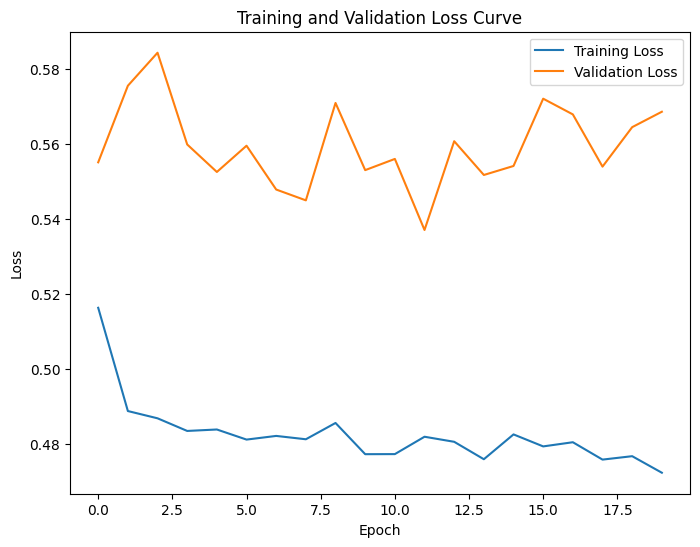

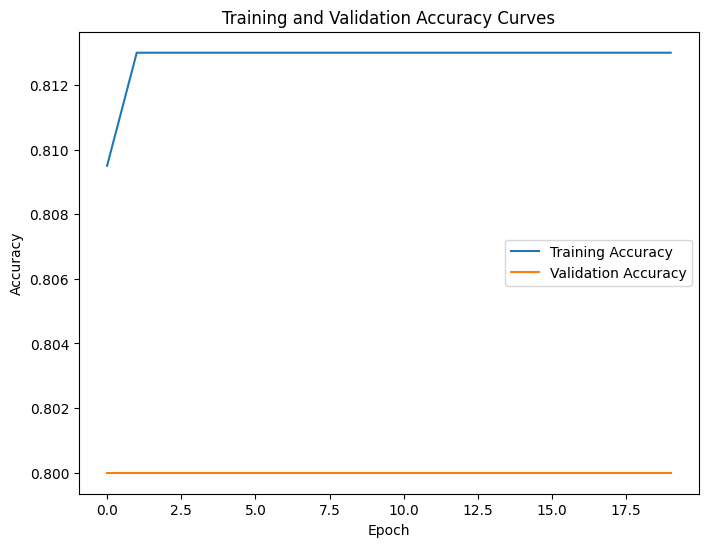

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(acc_train_list, label='Training Accuracy')
plt.plot(acc_val_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()